# Caso de Estudio - Análisis de Sentimientos en Textos

Existe un dataset con más de 25,000 reseñas de películas, las cuales son para entrenamiento y otras 25,000 disponibles para evaluar el desempeño.

Para analizar textos podemos representar cada texto (de cada muestra o documento, por ejemplo, cada reseña) como un vector de 1's y 0's que activan o no a la palabra. La bolsa de palabras (bag-of-words) sirve como base para indexar cada posible palabra en todos los textos y la transformación se le conoce como vectorización o tokenización.

Un texto equivale a un vector de activación de palabras, si por ejemplo, entre todos los documentos aparecen 78,000 palabras, entonces cada texto se transformaría en un vector de 78,000 características, para aprender una salida de positivo (verdadero) o negativo (falso).

Para este caso de estudio tomaremos la base de datos de reseñas de películas recolectadas por el IMDB que es una base de datos de películas y las reseñas extraídas de los usuarios en internet.

Cada reseña está en una carpeta llamada `train` o `test` y una subcarpeta llamada `pos` o `neg`, según si se considera una reseña para el aprendizaje o la evaluación, y si es positiva o negativa.

Se cuenta además con que el nombre de cada archivo es el ID de la película, un guión bajo (`_`) y su valoración en la escala del 1 al 10. Sin embargo, no usaremos la valoración del usuario para el aprendizaje, ya que podríamos identificar si es positiva o negativa únicamente con la valoración. Por lo tanto, solo aprenderemos a determinar si una reseña es positiva o negativa con solo el texto de la reseña. 

## PASO 1 - Descargar el dataset

Descargar el archivo `.tar.gz` desde https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz y descomprimirlo.

Ruta donde fue descomprimido: `/Users/dragonnomada/Downloads/aclImdb`

> Carpeta de entrenamiento de reseñas positivas

`/Users/dragonnomada/Downloads/aclImdb/train/pos`

> Carpeta de entrenamiento de reseñas negativas

`/Users/dragonnomada/Downloads/aclImdb/train/neg`

> Carpeta de evaluación de reseñas positivas

`/Users/dragonnomada/Downloads/aclImdb/test/pos`

> Carpeta de evaluación de reseñas negativas

`/Users/dragonnomada/Downloads/aclImdb/test/neg`

In [2]:
! ls /Users/dragonnomada/Downloads/aclImdb/train/pos | head -5

0_9.txt
10000_8.txt
10001_10.txt
10002_7.txt
10003_8.txt
ls: stdout: Undefined error: 0


In [3]:
! cat /Users/dragonnomada/Downloads/aclImdb/train/pos/0_9.txt

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

## PASO 2 - Construir un DataFrame con las columnas `ID`, `RANK`, `SENTIMENT`, `CONTENT`

In [4]:
import os

train_filenames_pos = os.listdir("/Users/dragonnomada/Downloads/aclImdb/train/pos")
train_filenames_neg = os.listdir("/Users/dragonnomada/Downloads/aclImdb/train/neg")
test_filenames_pos = os.listdir("/Users/dragonnomada/Downloads/aclImdb/test/pos")
test_filenames_neg = os.listdir("/Users/dragonnomada/Downloads/aclImdb/test/neg")

print("Train POS", len(train_filenames_pos))
print("Train NEG", len(train_filenames_neg))
print("Test POS", len(test_filenames_pos))
print("Test NEG", len(test_filenames_neg))

train_filenames_pos[:5]

Train POS 12500
Train NEG 12500
Test POS 12500
Test NEG 12500


['4715_9.txt', '12390_8.txt', '8329_7.txt', '9063_8.txt', '3092_10.txt']

Para cada nombre de archivo extraemos la lista con los IDs, la lista con los RANKs, la lista con los SENTIMENTs (positivo o negativo) y la lista con los CONTENTs.

In [5]:
train_ids = []
train_ranks = []
train_sentiments = []
train_contents = []

import re

for filename in train_filenames_pos:
    match = re.match(r"(\d+)\_(\d+)", filename)
    id = int(match.group(1))
    rank = int(match.group(2))
    content = None
    with open(f"/Users/dragonnomada/Downloads/aclImdb/train/pos/{filename}", "r") as file:
        content = file.read()
    #print(filename, id, rank, content[:20])
    train_ids.append(id)
    train_ranks.append(rank)
    train_sentiments.append(True)
    train_contents.append(content)
    
for filename in train_filenames_neg:
    match = re.match(r"(\d+)\_(\d+)", filename)
    id = int(match.group(1))
    rank = int(match.group(2))
    content = None
    with open(f"/Users/dragonnomada/Downloads/aclImdb/train/neg/{filename}", "r") as file:
        content = file.read()
    #print(filename, id, rank, content[:20])
    train_ids.append(id)
    train_ranks.append(rank)
    train_sentiments.append(False)
    train_contents.append(content)
    
import pandas as pd
    
train_data = pd.DataFrame({
    "ID": train_ids,
    "RANK": train_ranks,
    "SENTIMENT": train_sentiments,
    "CONTENT": train_contents,
})

train_data.sample(5)

,ID,RANK,SENTIMENT,CONTENT
9192,1662,7,True,The film of Artemisia may be considered treaso...
10146,9833,8,True,A terrorist attempts to steal a top secret bio...
7209,1819,9,True,"When I first watched this, we borrowed it from..."
18285,9091,1,False,"Seriously, I've read some of the reviews on th..."
8145,6104,10,True,"I must admit, out of the EROS MOVIE COLLECTION..."


In [6]:
train_data.groupby("RANK")["RANK"].agg("count")

RANK
1     5100
2     2284
3     2420
4     2696
7     2496
8     3009
9     2263
10    4732
Name: RANK, dtype: int64

In [7]:
train_data.groupby("SENTIMENT")["RANK"].agg("mean")

SENTIMENT
False    2.21696
True     8.73848
Name: RANK, dtype: float64

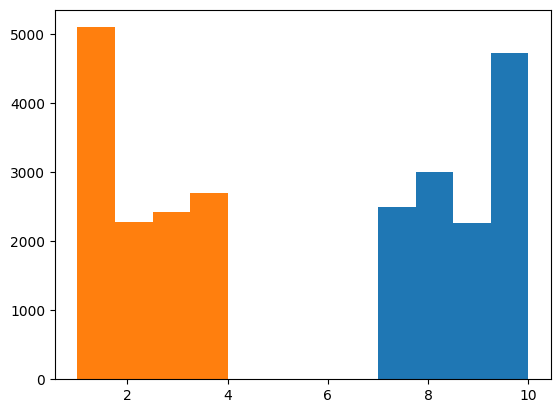

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_data[ (train_data["SENTIMENT"] == True) ]["RANK"], bins=4)
plt.hist(train_data[ (train_data["SENTIMENT"] == False) ]["RANK"], bins=4)

plt.show()

Repetimos el DataFrame para los Test

In [9]:
test_ids = []
test_ranks = []
test_sentiments = []
test_contents = []

import re

for filename in test_filenames_pos:
    match = re.match(r"(\d+)\_(\d+)", filename)
    id = int(match.group(1))
    rank = int(match.group(2))
    content = None
    with open(f"/Users/dragonnomada/Downloads/aclImdb/test/pos/{filename}", "r") as file:
        content = file.read()
    #print(filename, id, rank, content[:20])
    test_ids.append(id)
    test_ranks.append(rank)
    test_sentiments.append(True)
    test_contents.append(content)
    
for filename in test_filenames_neg:
    match = re.match(r"(\d+)\_(\d+)", filename)
    id = int(match.group(1))
    rank = int(match.group(2))
    content = None
    with open(f"/Users/dragonnomada/Downloads/aclImdb/test/neg/{filename}", "r") as file:
        content = file.read()
    #print(filename, id, rank, content[:20])
    test_ids.append(id)
    test_ranks.append(rank)
    test_sentiments.append(False)
    test_contents.append(content)
    
import pandas as pd
    
test_data = pd.DataFrame({
    "ID": test_ids,
    "RANK": test_ranks,
    "SENTIMENT": test_sentiments,
    "CONTENT": test_contents,
})

test_data.sample(5)

,ID,RANK,SENTIMENT,CONTENT
18373,7367,2,False,From the second the music swelled (second one ...
4395,4506,7,True,Guilt and redemption are two of the staple emo...
7656,10038,7,True,"Naturally, along with everyone else, I was pri..."
19545,4264,4,False,This movie did not give Mr. Bachchan justice. ...
24995,11513,1,False,With actors like Depardieu and Richard it is r...


## PASO 3 - Encontrar la bolsa de palabras para todos los textos

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Ajustar el tokenizador sirve para construir la bolsa de palabras de todos esos textos
vectorizer.fit([
    "Hola mundo mundial",
    "Hola el mundo está jugando el mundial",
    "Cuando digas hola procura saludar al mundo, estando en el mundial"
])

# El vocabulario representa el ID de cada palabra que sea vectorizada
vectorizer.vocabulary_

{'hola': 7,
 'mundo': 10,
 'mundial': 9,
 'el': 3,
 'está': 6,
 'jugando': 8,
 'cuando': 1,
 'digas': 2,
 'procura': 11,
 'saludar': 12,
 'al': 0,
 'estando': 5,
 'en': 4}

In [11]:
# Con el tokenizador podemos transformar textos a vectores de activación de palabras
vectorizer.transform([
    "Hola mundo saludar el mundial de Francia",
    "Jugando al mundial",
    "Cuando el mundo digas hola",
]).toarray()

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]])

In [12]:
train_data["CONTENT"]

0        For a movie that gets no respect there sure ar...
1        Bizarre horror movie filled with famous faces ...
2        A solid, if unremarkable film. Matthau, as Ein...
3        It's a strange feeling to sit alone in a theat...
4        You probably all already know this by now, but...
                               ...                        
24995    My comments may be a bit of a spoiler, for wha...
24996    The "saucy" misadventures of four au pairs who...
24997    Oh, those Italians! Assuming that movies about...
24998    Eight academy nominations? It's beyond belief....
24999    Not that I dislike childrens movies, but this ...
Name: CONTENT, Length: 25000, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(train_data["CONTENT"])

vectorizer.vocabulary_

{'for': 25450,
 'movie': 44147,
 'that': 66322,
 'gets': 27312,
 'no': 45805,
 'respect': 55262,
 'there': 66432,
 'sure': 64589,
 'are': 4124,
 'lot': 39486,
 'of': 46680,
 'memorable': 42134,
 'quotes': 53071,
 'listed': 38985,
 'this': 66562,
 'gem': 27073,
 'imagine': 32667,
 'where': 72757,
 'joe': 35415,
 'piscopo': 50102,
 'is': 34585,
 'actually': 1670,
 'funny': 26385,
 'maureen': 41471,
 'stapleton': 62846,
 'scene': 57873,
 'stealer': 63002,
 'the': 66339,
 'moroni': 43900,
 'character': 11615,
 'an': 3167,
 'absolute': 1316,
 'scream': 58249,
 'watch': 72246,
 'alan': 2464,
 'skipper': 60644,
 'hale': 29499,
 'jr': 35627,
 'as': 4465,
 'police': 50646,
 'sgt': 59148,
 'bizarre': 7518,
 'horror': 31685,
 'filled': 24523,
 'with': 73342,
 'famous': 23697,
 'faces': 23493,
 'but': 9881,
 'stolen': 63334,
 'by': 9962,
 'cristina': 15604,
 'raines': 53293,
 'later': 37864,
 'tv': 68685,
 'flamingo': 24887,
 'road': 56050,
 'pretty': 51594,
 'somewhat': 61646,
 'unstable': 70164,

In [14]:
len(vectorizer.vocabulary_)

74849

In [15]:
vectorizer.transform([
    "The movie is great, but is not so good",
    "I watch this movie with my girlfriend and is too amazing",
    "You never watch this",
]).toarray().shape

(3, 74849)

In [16]:
X_train = vectorizer.transform(train_data["CONTENT"])

X_train.shape

(25000, 74849)

In [17]:
X_train[0]

<1x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [18]:
y_train = train_data["SENTIMENT"].values

y_train.shape

(25000,)

Repetimos para el Test

In [19]:
X_test = vectorizer.transform(test_data["CONTENT"])
y_test = test_data["SENTIMENT"].values

X_test.shape, y_test.shape

((25000, 74849), (25000,))

In [20]:
#from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier()

#clf.fit(X_train, y_train)

#clf.score(X_test, y_test)

In [21]:
#from sklearn.svm import SVC

#from sklearn.decomposition import PCA

#pca = PCA(n_components=50)

#pca.fit(X_train.toarray())

#clf = SVC()

#clf.fit(pca.transform(X_train.toarray()), y_train)

#clf.score(pca.transform(X_test.toarray()), y_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.81356

In [23]:
X_samples = vectorizer.transform([
    "The movie is great, but is not so good",
    "I watch this movie with my girlfriend and is too amazing",
    "You never watch this",
    "The movie is amazing",
    "The movie is bad",
])

clf.predict(X_samples)

array([ True,  True, False,  True, False])

In [26]:
sample = input("Write your review:")

X_samples = vectorizer.transform([
    sample
])

sample, clf.predict(X_samples)[0]

('Is not good', False)

In [29]:
y_train_rank = train_data["RANK"].values
y_test_rank = test_data["RANK"].values

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train_rank)

reg.score(X_test, y_test_rank)

-2.1020836563645777

In [31]:
sample = input("Write your review:")

X_samples = vectorizer.transform([
    sample
])

sample, reg.predict(X_samples)[0]

('The movie is bad', 5.349006519209961)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(train_data["CONTENT"])

vectorizer.idf_

array([ 6.71995186,  5.7285084 , 10.43352392, ..., 10.43352392,
        9.51723319, 10.43352392])

In [38]:
X_train = vectorizer.transform(train_data["CONTENT"])
y_train = train_data["SENTIMENT"].values

X_train.shape, y_train.shape

((25000, 74849), (25000,))

In [39]:
X_test = vectorizer.transform(test_data["CONTENT"])
y_test = test_data["SENTIMENT"].values

X_test.shape, y_test.shape

((25000, 74849), (25000,))

In [40]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.82956